Within the first half of this program I will demonstrate finding the 6th newest year of vehicle (maximum year & price), 4th newest year of vehicle (minimum year & price), Identify and count the number of missing values. Then convert all the findings into a dataframe table and save into a csv file. In the second half the program I will create five unique graphs for statistic results.

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
#Reading csv file to import data to a dataframe called df
df = pd.read_csv('vehicles_data.csv',encoding = "ISO-8859-1")

C:\Users\guill\AppData\Local\Temp\ipykernel_1620\2656808776.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vehicles_data.csv',encoding = "ISO-8859-1")


In [3]:
#Printing the first rows of the dataframe to see the data
df.head()

,Date Of Stop,Time Of Stop,Description,Location,VehicleType,Year,Make,Model,Color,Violation Type,Race,Gender,Price
0,9/30/14,23:51:00,DRIVER FAILURE TO STOP AT STEADY CIRCULAR RED ...,PARK RD AT HUNGERFORD DR,02 - Automobile,2014.0,FORD,MUSTANG,BLACK,Citation,BLACK,M,7949.0
1,3/31/15,23:59:00,HEADLIGHTS (*),CONNECTICUT AT METROPOLITAN AVE,02 - Automobile,2003.0,HONDA,2S,BLUE,ESERO,HISPANIC,M,3022.0
2,9/30/14,23:30:00,FAILURE TO DISPLAY TWO LIGHTED FRONT LAMPS WHE...,OBSERVATION @ RIDGE ROAD,02 - Automobile,2009.0,TOYOTA,CAMRY,RED,Warning,BLACK,F,4939.0
3,3/31/15,23:59:00,DRIVER FAILURE TO STOP AT STOP SIGN LINE,W/B PLYERS MILL RD AT METROPOLITAN AVE,02 - Automobile,2007.0,ACURA,MDX,BLACK,Warning,WHITE,F,4105.0
4,3/31/15,23:58:00,STOP LIGHTS (*),2355 NB AT BATTERY LN,02 - Automobile,2003.0,NISSAN,MURANO,SILVER,ESERO,OTHER,M,3000.0


In [4]:
#Using the info function to find what data types each column is assigned to
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803889 entries, 0 to 803888
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date Of Stop    803889 non-null  object 
 1   Time Of Stop    803889 non-null  object 
 2   Description     803884 non-null  object 
 3   Location        803058 non-null  object 
 4   VehicleType     803060 non-null  object 
 5   Year            797845 non-null  object 
 6   Make            803017 non-null  object 
 7   Model           802933 non-null  object 
 8   Color           792950 non-null  object 
 9   Violation Type  803060 non-null  object 
 10  Race            803060 non-null  object 
 11  Gender          802231 non-null  object 
 12  Price           802231 non-null  float64
dtypes: float64(1), object(12)
memory usage: 79.7+ MB


In [5]:
#Changing the time of stop and date of stop to a datetime data type also changing any errors to NaN using coerce
df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], errors='coerce')
df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'], errors='coerce')

#loops through the list char_columns and replaces any string that has'nan' in those columns of the DataFrame 
#with the actual NaN values for correct missing data.
char_columns = [
    'Description', 'Location', 'VehicleType', 'Make', 'Model',
    'Color', 'Violation Type', 'Race', 'Gender']

for col in char_columns:
    df[col] = df[col].replace('nan', np.nan)

#changing the year object to a float datatype
df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('float')

C:\Users\guill\AppData\Local\Temp\ipykernel_1620\2675643131.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time Of Stop'] = pd.to_datetime(df['Time Of Stop'], errors='coerce')
C:\Users\guill\AppData\Local\Temp\ipykernel_1620\2675643131.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date Of Stop'] = pd.to_datetime(df['Date Of Stop'], errors='coerce')


In [6]:
#Using the info function again to see if the data type updated correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803889 entries, 0 to 803888
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date Of Stop    803060 non-null  datetime64[ns]
 1   Time Of Stop    803060 non-null  datetime64[ns]
 2   Description     803884 non-null  object        
 3   Location        803058 non-null  object        
 4   VehicleType     803060 non-null  object        
 5   Year            797045 non-null  float64       
 6   Make            803017 non-null  object        
 7   Model           802933 non-null  object        
 8   Color           792950 non-null  object        
 9   Violation Type  803060 non-null  object        
 10  Race            803060 non-null  object        
 11  Gender          802231 non-null  object        
 12  Price           802231 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 79.7+ MB


In [7]:
#creating a df that caps the price to 1000,000 because of the unrealistic prices on a toyota camry
df_filtered = df[df['Price'] <= 100000]

#Creating a numpy array that contain the unique year values in descending order
sorted_years = df_filtered['Year'].dropna().sort_values(ascending=False).unique()

#We are grabbing the sixth element which is index 5 from newest to oldest.
sixth_newest_year = sorted_years[5]

#Isolating all rows from the sixth newest year in the filtered data
#and placing the results into the df_sixth_year dataframe.
df_sixth_year = df_filtered[df_filtered['Year'] == sixth_newest_year]

#Using the max function to get the max price from the df_sixth_year dataframe.
max_price = df_sixth_year['Price'].max()

#New dataframe that contains all vehicles from the sixth newest year
#that have the maximum price and will show the make, model, and price columns.
max_price_vehicles = df_sixth_year[df_sixth_year['Price'] == max_price][['Make', 'Model', 'Price']]
max_price_vehicles


,Make,Model,Price
229726,BMW,2DR,84025.0
229727,BMW,2DR,84025.0


In [8]:
#Creating a numpy array of unique year from oldest to the newest
sorted_years_asc = df['Year'].dropna().sort_values(ascending=True).unique()

#We are grabbing the fourth element which is index 3 from the sorted years numpy array
#and placing into the variable fourth oldest year
fourth_oldest_year = sorted_years_asc[3]

#then I will filter the df only keeping the rows that match the year that is stored in the 
#fourth_oldest_year
df_fourth_oldest = df[df['Year'] == fourth_oldest_year]

#Using the min function to gather the lowest price from the 4th oldest year
min_price = df_fourth_oldest['Price'].min()

#Creating a dataframe that contains all vehicles from the 4th oldest year that have
#the lowest price, showing only the make, model, and price
min_price_vehicles = df_fourth_oldest[df_fourth_oldest['Price'] == min_price][['Make', 'Model', 'Price']]
min_price_vehicles

,Make,Model,Price
371046,TOYT,VN,500.0
658673,CHEV,4S,500.0


In [9]:
#Creating a panda series that shows all the missing values within each column
number_of_missing_values = df[df.columns[df.isnull().any()]].isnull().sum()

In [10]:
number_of_missing_values

Date Of Stop        829
Time Of Stop        829
Description           5
Location            831
VehicleType         829
Year               6844
Make                872
Model               956
Color             10939
Violation Type      829
Race                829
Gender             1658
Price              1658
dtype: int64

I will then create a new dataframe called summary which will hold the missing values for the sixth_oldest_year and the fourth_oldest_year dataframes. This will show the total missing values of year and price for both oldest and newest.

In [11]:
#Filter valid years between 1900 and 2025
df_valid = df[(df['Year'] >= 1900) & (df['Year'] <= 2025)]

#Calculating missing counts on the original df
missing_year_count = df['Year'].isnull().sum()
missing_price_count = df['Price'].isnull().sum()

#Getting unique valid years sorted descending for newest
unique_years_desc = sorted(df_valid['Year'].dropna().unique(), reverse=True)
sixth_newest_year = unique_years_desc[5]

df_sixth_newest = df_valid[df_valid['Year'] == sixth_newest_year]
max_price_sixth_newest = df_sixth_newest['Price'].max()

# Get unique valid years sorted ascending from oldest
unique_years_asc = sorted(df_valid['Year'].dropna().unique())
fourth_oldest_year = unique_years_asc[3]

df_fourth_oldest = df_valid[df_valid['Year'] == fourth_oldest_year]
min_price_fourth_oldest = df_fourth_oldest['Price'].min()

#Creating a summary DataFrame with missing counts in their respective columns
summary_df = pd.DataFrame({
    'Analysis': ['6th Newest Vehicle Year', '4th Oldest Vehicle Year', 'Missing Values'],
    'Year': [sixth_newest_year, fourth_oldest_year, missing_year_count],
    'Price': [max_price_sixth_newest, min_price_fourth_oldest, missing_price_count]
})

summary_df

,Analysis,Year,Price
0,6th Newest Vehicle Year,2020.0,9322.0
1,4th Oldest Vehicle Year,1925.0,500.0
2,Missing Values,6844.0,1658.0


In [12]:
#Saving summary_df to a csv file
summary_df.to_csv('vehicle_analysis_summary.csv', index=False)

This bar graph displays the top 10 most common vehicle colors in the dataset. Each bar represents a color, and its height indicates how frequently that color appears among all vehicles. This visualization helps identify which colors are most popular and which are less common.

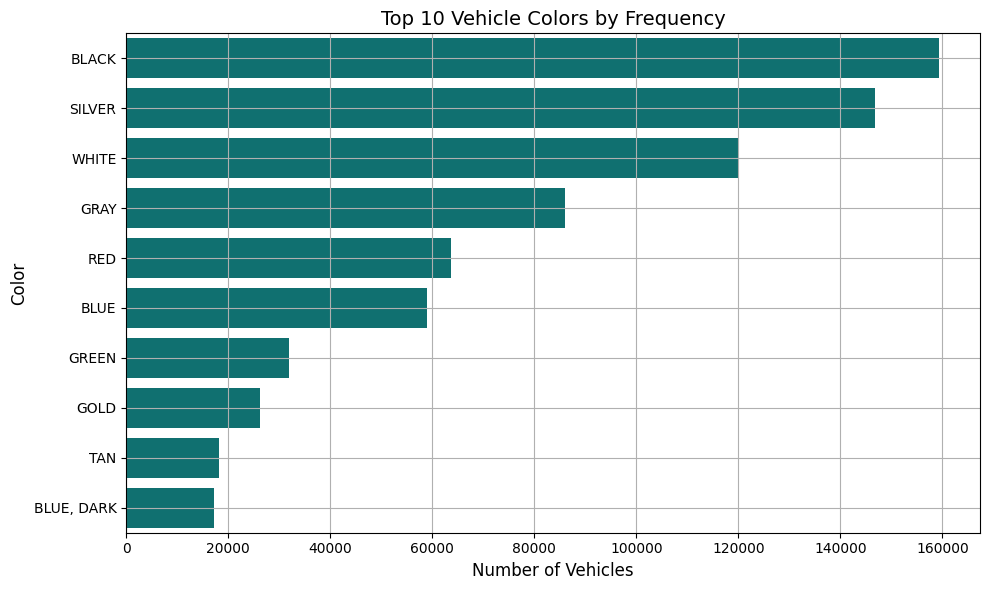

In [13]:
#figure size
plt.figure(figsize=(10,6))

#plot figure
color_counts = df['Color'].value_counts().head(10)
sns.barplot(x=color_counts.values, y=color_counts.index, color='teal')

#plot title
plt.title('Top 10 Vehicle Colors by Frequency', fontsize=14)

#x and y labels
plt.xlabel('Number of Vehicles', fontsize=12)
plt.ylabel('Color', fontsize=12)

#creating grid
plt.grid(True)

#making sure the layout is adjusted automatically
plt.tight_layout()

plt.show()


This pie chart illustrates the proportion of vehicle stops by gender, its categorized as male, female, and unknown. Each slice represents the percentage of total stops for relative to that gender group.

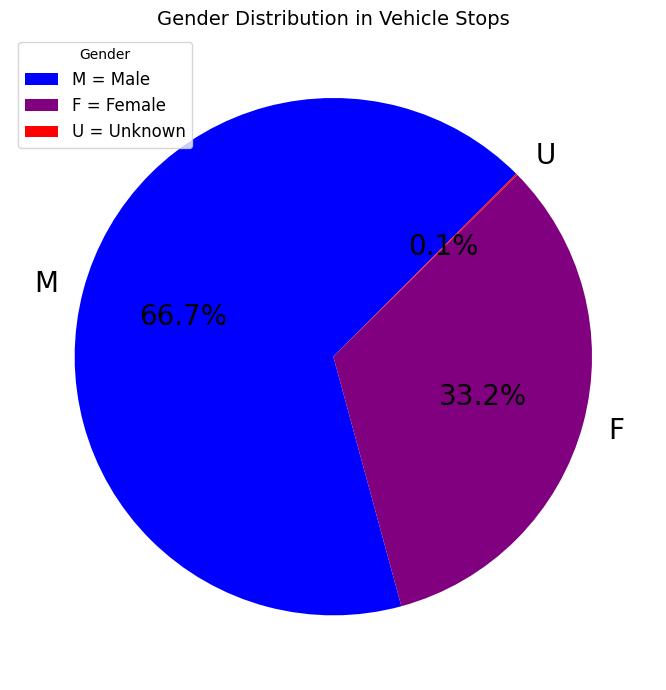

In [14]:
#Counting how many times each unique value appears in the gender column
gender_counts = df['Gender'].value_counts()

#Plot figure with custom sizes
plt.figure(figsize=(7,7))

#creating pie chart that shows vehicle stops by gender, colors, and the formatted percentages
patches, texts, autotexts = plt.pie(gender_counts.values, labels=gender_counts.index, startangle=45,
    colors=["blue", "purple", "red"][:len(gender_counts)], autopct='%1.1f%%',textprops={'fontsize': 20},
)

#Custom legend labels to make it easier for readability
legend_labels = {
    'M': 'Male',
    'F': 'Female',
    'U': 'Unknown'
}

#creating the list of legend with corresponding descriptions
legend_texts = [f"{label} = {legend_labels.get(label, label)}" for label in gender_counts.index]

#adds the legend to the pie chart and automatically positions the gender title
plt.legend(patches, legend_texts, title='Gender', loc='best', fontsize=12)

#plot title
plt.title('Gender Distribution in Vehicle Stops', fontsize=14)

#making sure the layout is adjusted automatically
plt.tight_layout()
plt.show()


This bar graph displays the top 10 most common vehicles based on their count in the dataset. Each bar represents a specific make, and its height corresponds to how many times that make appears.

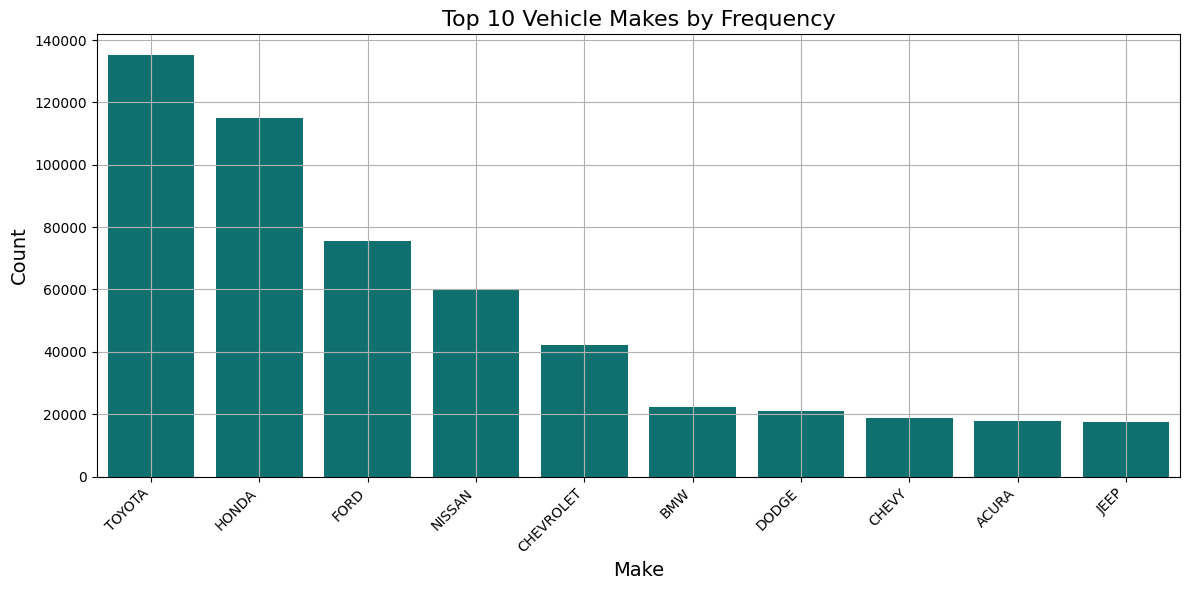

In [15]:
make_mapping = {
    'TOYT': 'TOYOTA',
    'HOND': 'HONDA',
    'CHEV': 'CHEVROLET',
    'NISS': 'NISSAN',
}

#Replacing abbreviations with full names
df['Make'] = df['Make'].replace(make_mapping)

#Counting the frequencies again
make_counts = df['Make'].value_counts().reset_index()
make_counts.columns = ['Make', 'Count']

#top 10
top_makes = make_counts.head(10)

#plot bar graph
plt.figure(figsize=(12,6))
sns.barplot(data=top_makes, x='Make', y='Count', color='teal')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Vehicle Makes by Frequency', fontsize=16)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


This bar graph shows the count of vehicle stops by gender for the top 10 most common vehicle makes. Each group of bars represents a vehicle make, with separate bars for male, female, and unknown drivers.

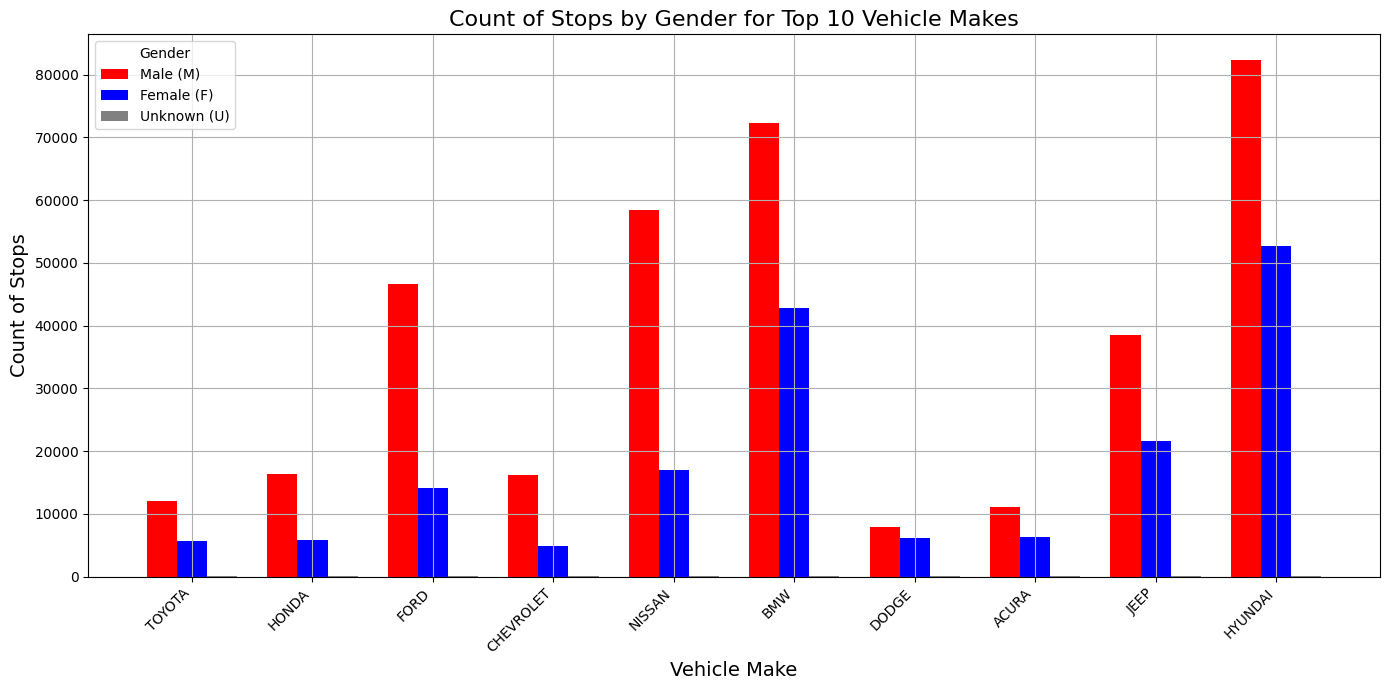

In [16]:

make_mapping = {
    'CHEVY': 'CHEVROLET'
}
df['Make'] = df['Make'].replace(make_mapping)

# Get top 10 vehicle makes by total stops
top_makes = df['Make'].value_counts().head(10).index.tolist()

#Filter df for these makes and count stops by Make and Gender
gender_make_counts = df[df['Make'].isin(top_makes)].groupby(['Make', 'Gender']).size().unstack(fill_value=0)

#Prepare the plot
x_pos = np.arange(len(top_makes))  
width = 0.25  #width of bars

plt.figure(figsize=(14,7))

#Plot bars for each gender category
plt.bar(x_pos - width, gender_make_counts.get('M', pd.Series([0]*len(top_makes))), 
        width=width, color='red', align='center', label='Male (M)')
plt.bar(x_pos, gender_make_counts.get('F', pd.Series([0]*len(top_makes))), 
        width=width, color='blue', align='center', label='Female (F)')
plt.bar(x_pos + width, gender_make_counts.get('U', pd.Series([0]*len(top_makes))), 
        width=width, color='gray', align='center', label='Unknown (U)')

#adding titles for labels and legend, adding the grid and adjusting layout
plt.xlabel('Vehicle Make', fontsize=14)
plt.ylabel('Count of Stops', fontsize=14)
plt.title('Count of Stops by Gender for Top 10 Vehicle Makes', fontsize=16)
plt.xticks(x_pos, top_makes, rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(True)
plt.tight_layout()
plt.show()


This line graph displays the trend of average vehicle prices by year from 1990 to 2025. Each point on the line represents the average price for vehicles manufactured in that year. This visualization helps illustrate how vehicle prices have changed over time which shows any upward or downward trends across the years.

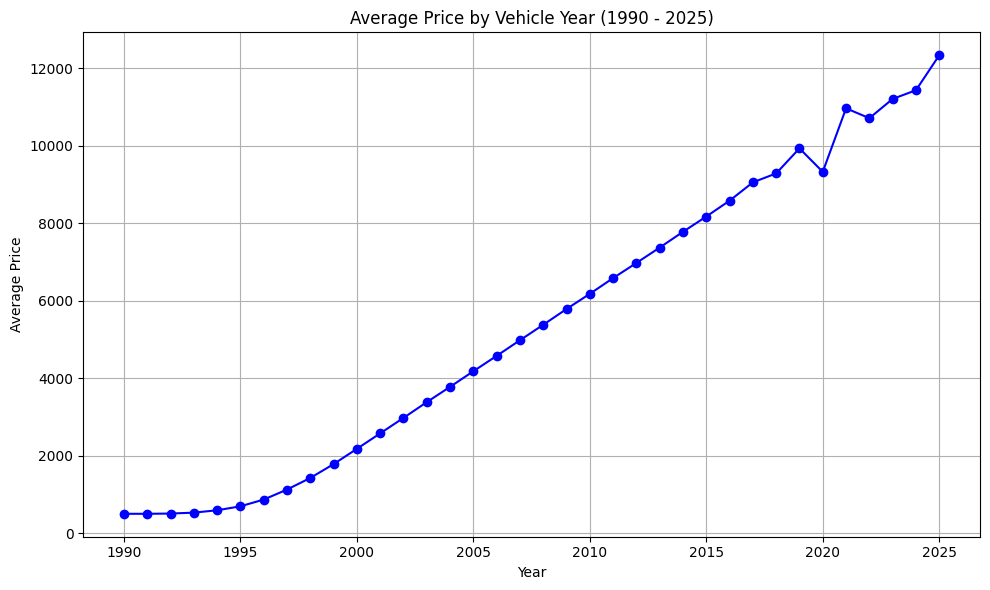

In [17]:
#Filter years between 1900 and 2025
df_valid_years = df[(df['Year'] >= 1990) & (df['Year'] <= 2025)]

#Group by Year and calculate average price
avg_price_by_year = df_valid_years.groupby('Year')['Price'].mean().dropna()

#Plotting the figure and adjusting columns
plt.figure(figsize=(10,6))
plt.plot(avg_price_by_year.index, avg_price_by_year.values, marker='o', color='blue')

#naming labels and adding grid
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Year (1990 - 2025)')
plt.grid(True)
plt.tight_layout()
plt.show()
